### Homework 3.6 - Voice Changer

We will try to make a simple voice changer by manipulating the frequency domain.

In this problem, you will have to make a short vocal record of about 10-15 seconds (no noise). Play around with the frequency domain to change the pitch of the audio and then invert it back to time domain in order to test the new voice. Make at least 2 new different voices.

**You must show all the steps clearly. Write your explanation in the markdown boxes.**

In [1]:
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc, fftpack

1. Read .wav file as an input as data on time domain

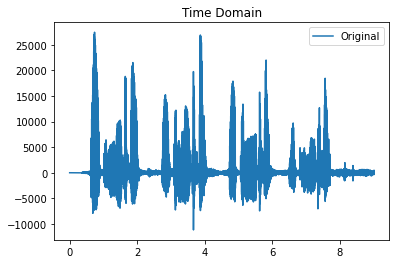

In [2]:
freq, y = wavfile.read('images/Voice 004.wav')

dt = 1/freq
t = np.linspace(0, (len(y)-1)*dt, len(y))
plt.plot(t, y, label='Original')
plt.title('Time Domain')
plt.legend()

2. Use .rfft to apply FFT on the data points
3. Now the data is on frequency domain

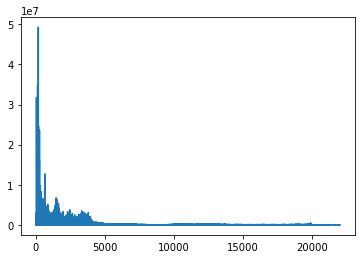

In [3]:
n = len(t)
yf = fftpack.rfft(y)
xf = fftpack.rfftfreq(n, dt)

plt.plot(xf, np.abs(yf))

4. Manipulate the frequencies by swapping the first half and the last half in the data array

In [4]:
new_yf = yf.copy()
mid = len(yf)//2

new_yf[mid:] = yf[:mid]
new_yf[:mid] = yf[mid:]

5. Compare the manipulated data with the original data

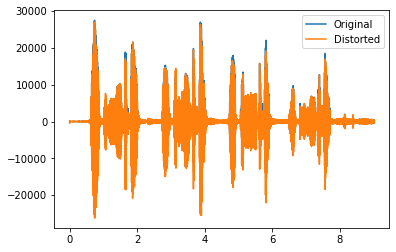

In [5]:
new_f = fftpack.irfft(new_yf)

plt.plot(t, y, label="Original")
plt.plot(t, new_f, label="Distorted")
plt.legend()

6. Write the data onto a .wav file

In [6]:
wavfile.write("images/Voice 004 Distorted 1.wav", freq, np.array(new_f, dtype=np.int16))

7. Try out different manipulation on the data.
8. Try to stretch the signal by doubling the data. For example the original data was [1,2,3], the manipulated data would be [1,1,2,2,3,3].

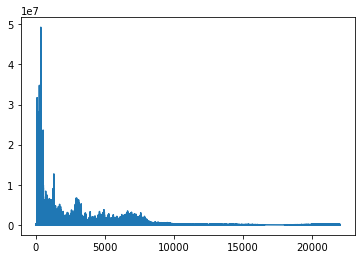

In [11]:
content = [0 for x in yf]
content1 = [x for x in yf]
content2 = [x for x in yf]

abs_yf = np.abs(yf)

idx1 = 0
idx2 = 0
for i in range(len(yf)):
    if i%2 == 0 and idx1 < len(yf):
        content[i] = content1[idx1]
        idx1 += 1
    elif i%2 != 0 and idx2 < len(yf):
        content[i] = content2[idx2]
        idx2 += 1

plt.plot(xf, np.abs(content))
# len(content),len(content1),len(content2)

9. Compare the manipulated data with the original data and plot the difference.

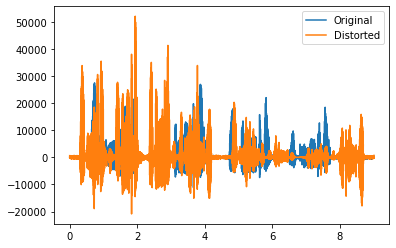

In [9]:
new_f = fftpack.irfft(content)

plt.plot(t, y, label="Original")
plt.plot(t, new_f, label="Distorted")
plt.legend()

10. Write the new data into a new .wav file

In [10]:
wavfile.write("images/Voice 004 Distorted 2.wav", freq, np.array(new_f, dtype=np.int16))